# Assignment 7
### Do any five.

Link for the handwritten portions: https://myuva-my.sharepoint.com/:b:/g/personal/fty3dt_virginia_edu/IQDdTmzhOo_iRY20DbrM5UKQAbZkavHtNirRsE0Y0_hxznY?e=T056Az

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?
- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

**Responses:**

1. The expceted value of a single die roll is 1/6 x 1 + 1/6 x 2 + 1/6 x 3 + 1/6 x 4 + 1/6 x 5 + 1/6 x 6 = 21/6 = 3.5; this is the mean value of all the possible results.

2. The expected value of rolling two dice and adding the results together is 1/36 x 2 + 2/36 x 3 + 3/36 x 4 + 4/36 x 5 + 5/36 x 6 + 6/36 x 7 + 5/36 x 8 + 4/36 x 9 + 3/36 x 10 + 2/36 x 11 + 1/36 x 12 = 292/36 = 7; this is also the mean value of all the possible results.

In [26]:
# 3)
import numpy as np

roulette_dict = {"green": [0,37,38], # represents the 3 spots that 0 takes up using distinct nubmmers
                 "red": [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],
                 "black": [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]
                 }


def spin_wheel():
    # No seed, to make it truly random
    rng = np.random.default_rng()
    landed = rng.integers(0,39,1)
    for key in roulette_dict:
        for i in range(len(roulette_dict[key])):
            if roulette_dict[key][i] == landed:
                spin_result = key, roulette_dict[key][i]
    return spin_result

def bet_result(bet): # Bet must be given as a list
    spin_result_color = spin_wheel()[0]
    spin_result_number = spin_wheel()[1]
    # Length of the input array, i.e.m how many numbers were guessed
    K = len(bet)
    # Start with no payout
    payout = -1.00
    # For each bet in the input array
    for i in range(0,K):
        # If a number is given
        if type(bet[i]) == int: 
            # If that bet is the spin_result_number
            if bet[i] == spin_result_number:
                payout_option = 36/K - 1
                payout = max(payout_option, payout)
            else:
                payout_option = -1.00
                payout = max(payout_option, payout)
        # If a color is given
        if type(bet[i]) == str:
            # If the color is right
            if bet[i] == spin_result_color:
                payout_option = 36/18 - 1
                payout = max(payout_option, payout)
            else:
                payout_option = -1.00
                payout = max(payout_option, payout)
    return float("%.2f" % payout)

def avg_bet_result(bet):
    thous = [bet_result(bet) for _ in range(1000)]
    avg = float("%.2f" % (sum(thous)/len(thous)))
    return avg

print(f"Average payout of betting on red 1000 times: {avg_bet_result(['red'])}")
print(f"Average payout of betting on odd 1000 times: {avg_bet_result([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37])}")
print(f"Average payout of betting on 7 1000 times: {avg_bet_result([7])}")
print(f"Average payout of betting on a split 1000 times: {avg_bet_result([1,2])}")
print(f"Average payout of betting on a line 1000 times: {avg_bet_result([1,2,3,4,5,6])}")

# You literally always lose money on average. The house does indeed always win!

Average payout of betting on red 1000 times: -0.12
Average payout of betting on odd 1000 times: -0.11
Average payout of betting on 7 1000 times: 0.15
Average payout of betting on a split 1000 times: 0.21
Average payout of betting on a line 1000 times: 0.04


**More Responses:**

3. Looking at the above code, it's clear that the average payout is negative. But generalizing to ANY gamble, you pay one dollar to bet on K slots, so that gets subtracted from the get go. You win with probability K/37 and get a $36/K payout. But you lose with probability of (37-K)/37 for a payout of $0. 

- This becomes K/37 x 36/K + (37-K)/37 x 0 - 1 = 36/27 - 1 = -0.027.

- So your average "payout" is a loss of 3 cents.

4. The expected value is 1/6 x 1 + 1/6 x 2 + 1/6 x 3 + 1/6 x 4 + 1/6 x 5 + 1/6 x (6 + 3.5) where 3.5 is the mean of another roll. This equals 3.5 + 3.5/6 = 4.083.

In [27]:
# 5) Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? 

def die_roll():
    return np.random.randint(1,7)

def add_if_six():
    # First roll to get things started
    val = die_roll()
    # If the roll is 6, roll again
    # While loop ensures you keep doing this.
    while val == 6:
        val = val + die_roll()
    return val

def expected_value(n):
     vals = [add_if_six() for _ in range(n)]
     exp = sum(vals)/n
     return exp
    
print(expected_value(10000000)) # Returns 4.0831792

4.0833913


**More Responses:**

5. You can also understannd this by seeing that this is a recursive function. The value for rolling again is equal to 21/6 PLUS 1/6 times the value of rolling again!! The value for rolling again therefore equals 21/5 or about 4.2.

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

https://myuva-my.sharepoint.com/:b:/g/personal/fty3dt_virginia_edu/IQDdTmzhOo_iRY20DbrM5UKQAbZkavHtNirRsE0Y0_hxznY?e=T056Az

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


https://myuva-my.sharepoint.com/:b:/g/personal/fty3dt_virginia_edu/IQDdTmzhOo_iRY20DbrM5UKQAbZkavHtNirRsE0Y0_hxznY?e=T056Az

## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

https://myuva-my.sharepoint.com/:b:/g/personal/fty3dt_virginia_edu/IQDdTmzhOo_iRY20DbrM5UKQAbZkavHtNirRsE0Y0_hxznY?e=T056Az

In [28]:
import pandas as pd

df = pd.read_csv('./data/metabric.csv')
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [29]:
import plotly.express as px

px.histogram(df['Radio Therapy'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'variable=Radio Therapy<br>value=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Radio Therapy',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Radio Therapy',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['YES', 'NO', 'YES', ..., 'YES', 'YES', 'YES'],
                         shape=(1343,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'value'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [30]:
# By overall survival

px.histogram(df['Radio Therapy'], df['Overall Survival (Months)'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'x=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('hoiIiIgoVUBmZmZmZnZkQNLd3d3dnW' ... 'qqCmlAZmZmZmZmLUAAAAAAAJhxQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

### Assuming a binomial distribution

The likelihood of p given n and y is SUM FROM o = 1 to N OF ( n choose y_i ) * p ^ y_i * ( 1 - p ) ^ ( n - y_i ).

Source: [text](../terry_assignments/understanding_uncertainty_assignments/get_data.py)

The MLE is SUM FROM i = i TO N OF y_i/n, as shown in the attached/linked document. Help from Google AI results with this part.

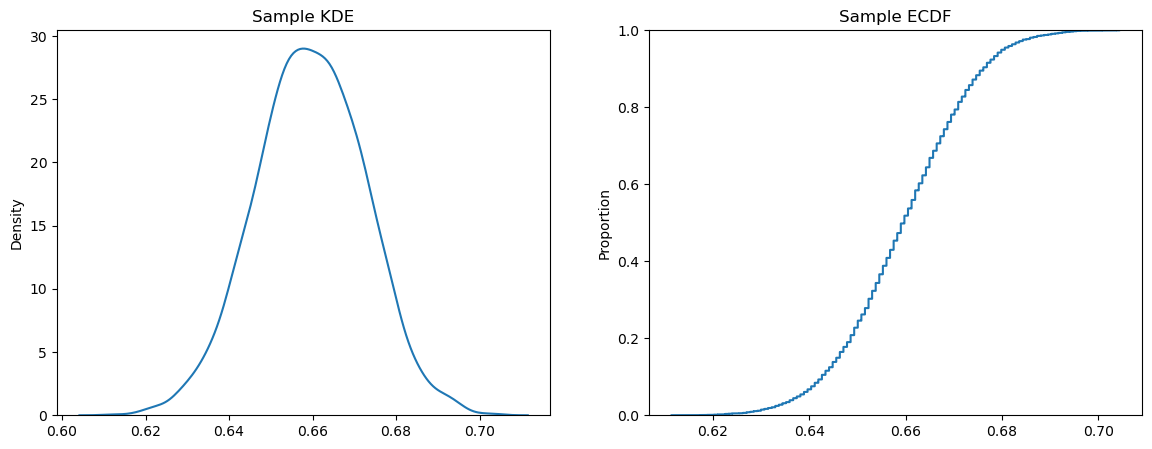

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

y = df['Radio Therapy']


y = pd.to_numeric( y.replace({'NO':'0','YES':'1'}) , errors='coerce' ) # Convert string to numeric


# Bootstrapping code adapted from Prof Johnson's GitHub
S = 5000
sample = [np.mean(y.sample(frac=1, replace=True)) for _ in range(S)]

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sample ECDF')
plt.show()

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

https://myuva-my.sharepoint.com/:b:/g/personal/fty3dt_virginia_edu/IQDdTmzhOo_iRY20DbrM5UKQAbZkavHtNirRsE0Y0_hxznY?e=T056Az

<Axes: xlabel='price', ylabel='Density'>

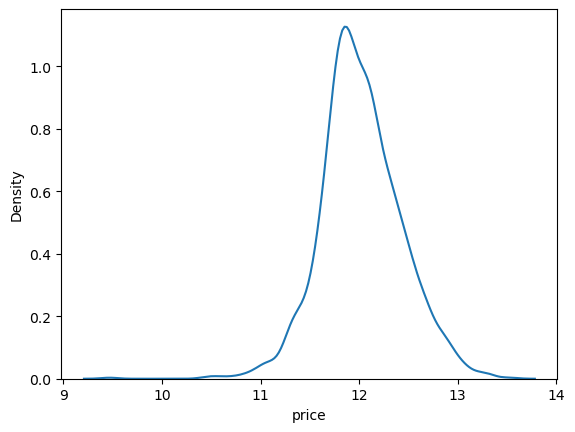

In [32]:
df = pd.read_csv('./data/ames_prices.csv')

sns.kdeplot(np.log(df['price']))
# I chose to take a log of price because the KDE without a log looks like a log normal:
# Right skewed/has a long tail on the right.
# Taking the log helps standardize the data more and makes the scale more reasonable.

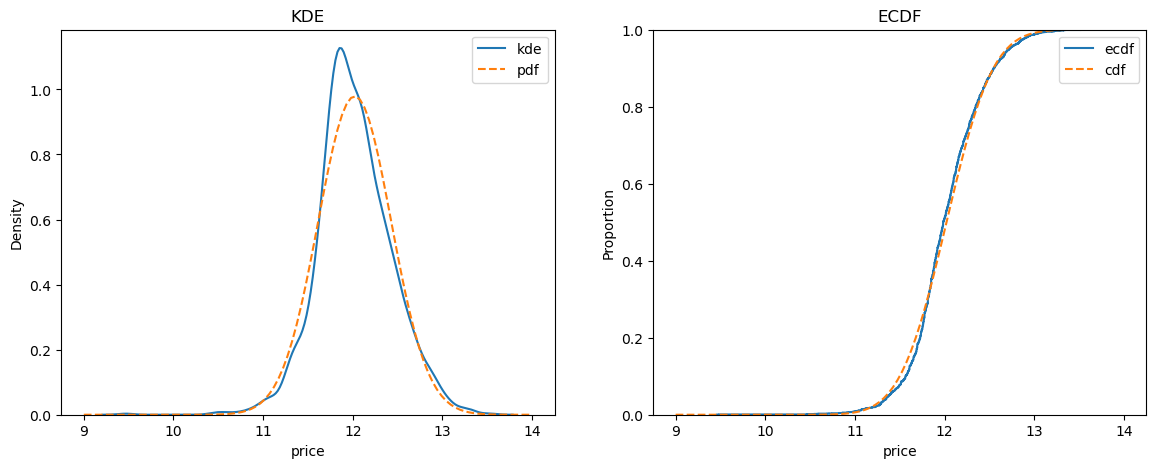

In [36]:
import scipy as sp

y = np.log( df['price'] )
# Mu is the mean
mu_hat = np.mean(y)
# Sigma is the standard deviation
sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )

# Make a grid
grid = np.linspace(9,14,100)

# Make the pdf and cdf
pdf = sp.stats.norm.pdf(grid,loc=mu_hat,scale=sigma_hat)
cdf = sp.stats.norm.cdf(grid,loc=mu_hat,scale=sigma_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=y,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('KDE')
sns.ecdfplot(x=y,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('ECDF')
plt.show()

- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.

The fit is just okay for the KDE; it looks better for the ECDF but still isn't perfect. The KDE peaks at a lower price and more sharply. The ECDF rises more gradually at the beginning.

- Bootstrap the sampling density/distribution of your parameters.

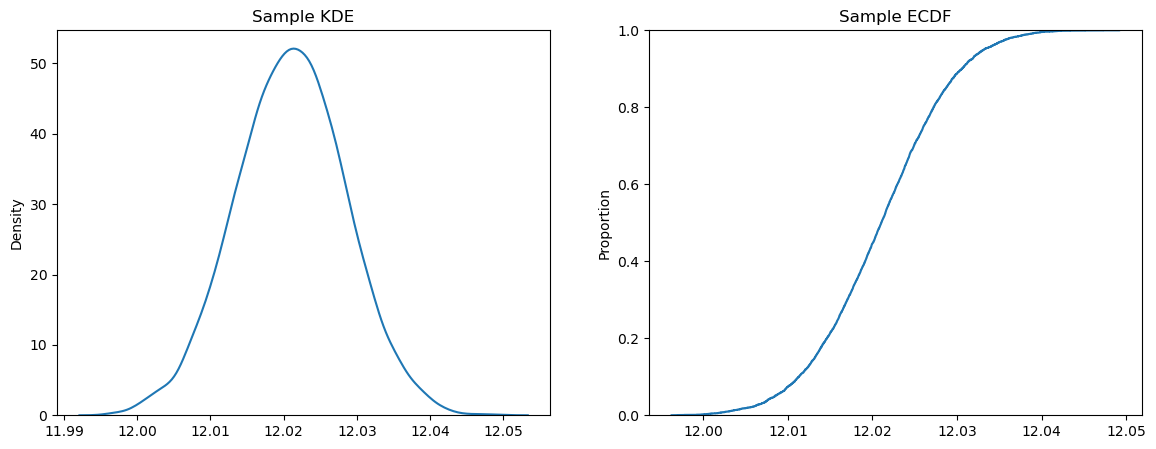

In [34]:
# Bootstrapping code adapted Prof Johnson's GitHub
# Bootstrapping log of price:
y = np.log( df['price'] )
S = 5000
sample = [np.mean(y.sample(frac=1, replace=True)) for _ in range(S)]

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sample ECDF')
plt.show()

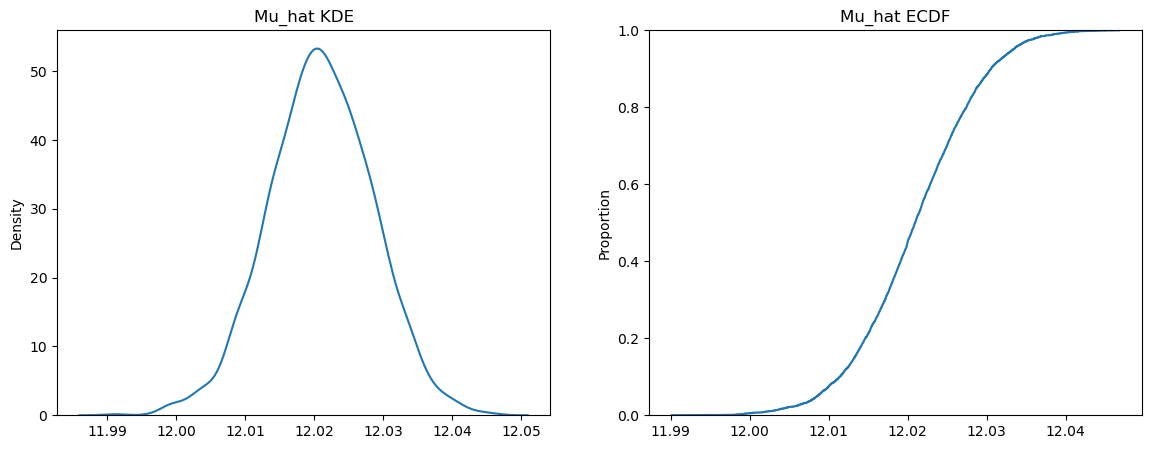

In [43]:
# Bootstrapping mu_hat: 

S = 5000
sample = [np.mean(y.sample(frac=1, replace=True)) for _ in range(S)]
mu_hat = [np.mean(s) for s in sample]

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=mu_hat,ax=axes[0],label='kde')
axes[0].set_title('Mu_hat KDE')
sns.ecdfplot(x=mu_hat,ax=axes[1],label='ecdf')
axes[1].set_title('Mu_hat ECDF')
plt.show()

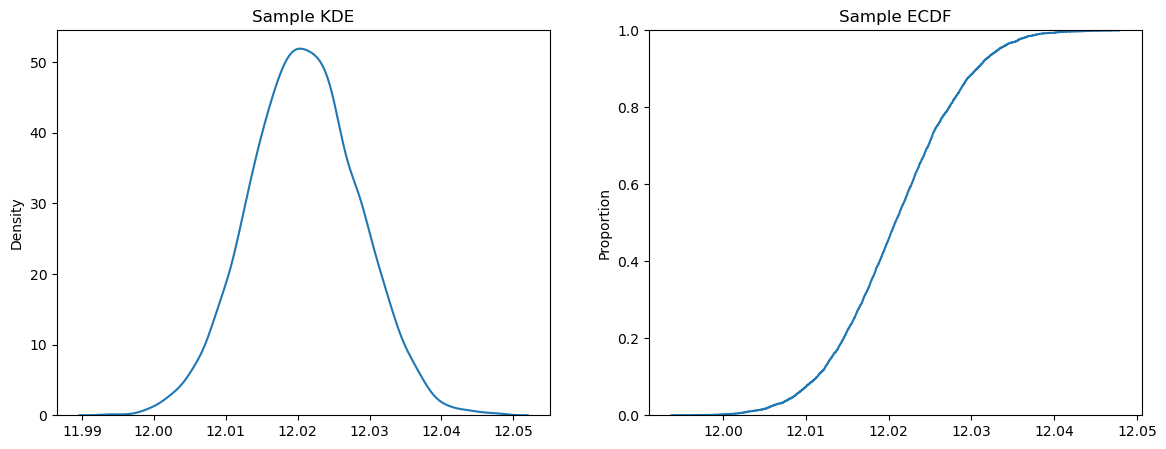

In [ ]:
# Bootstrapping sigma_hat: 

S = 5000
sample = [np.mean(y.sample(frac=1, replace=True)) for _ in range(S)]
mu_hat = [np.mean(s) for s in sample]
sigma_hat = [np.sqrt( np.mean( (y-m)**2 ) ) for m in mu_hat]

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=mu_hat,ax=axes[0],label='kde')
axes[0].set_title('Sigma_hat KDE')
sns.ecdfplot(x=mu_hat,ax=axes[1],label='ecdf')
axes[1].set_title('Sigma_hat ECDF')
plt.show()

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.